Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/YOLOv6-main"
!pip install -r "requirements.txt"

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/YOLOv6-main
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 10.4 MB/s 
     |████████████████████████████████| 2.0 MB 70.6 MB/s 
     |████████████████████████████████| 237 kB 63.2 MB/s 
     |████████████████████████████████| 51 kB 7.6 MB/s 


Downloading a Pretrained Model

In [ ]:
import torch
torch.hub.download_url_to_file('https://github.com/meituan/YOLOv6/releases/download/0.2.0/yolov6s.pt', 'yolov6s.pt')

  0%|          | 0.00/36.3M [00:00<?, ?B/s]

Deleting Last Runs

In [ ]:
import shutil
shutil.rmtree('runs')
%ls

configs/         docs/            README_cn.md      tools/           yolov6s.pt
custom_dataset/  inference.ipynb  README.md         turtorial.ipynb
deploy/          LICENSE          requirements.txt  yolov6/


Train (Image Size = 416 , Batch Size = 8 , Epochs = 50)

In [ ]:
!python tools/train.py --data-path custom_dataset/data.yaml --conf-file configs/yolov6s_finetune.py --img-size 416 --batch-size 8 --epochs 50

Using 1 GPU for training... 
training args are: Namespace(batch_size=8, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6s_finetune.py', data_path='custom_dataset/data.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=50, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 202/202 [00:01<00:00, 126.49it/s]
Train: Checking formats of labels with 2 process(es): 
202 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 202/202 [00:27<00:00,  7.35it/s]
Train: Final numbers of valid images: 202/ labels: 202. 
30.6s for datase

Evaluation

In [ ]:
!python tools/eval.py --data custom_dataset/data.yaml --weights runs/train/exp/weights/best_ckpt.pt --batch-size 8 --img-size 416

Namespace(batch_size=8, conf_thres=0.03, config_file='', data='custom_dataset/data.yaml', device='0', do_coco_metric=True, do_pr_metric=False, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=416, iou_thres=0.65, letterbox_return_int=False, name='exp', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=False, weights='runs/train/exp/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 18.

Inference (Random Test Image)

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='custom_dataset/images/test/e4583d082076b2b549b3736ad1b193c9_jpg.rf.55af0c9be903e4dda4a002af87bdeaac.jpg', view_img=False, weights='runs/train/exp/weights/best_ckpt.pt', yaml='custom_dataset/data.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:00<00:00, 20.76it/s]
Results saved to runs/inference/exp



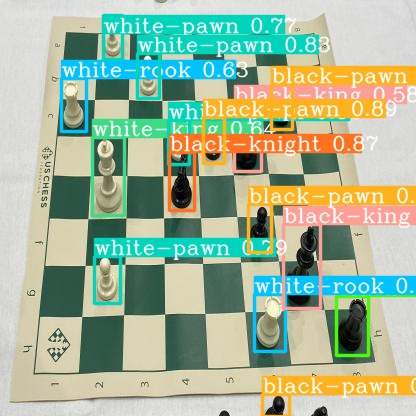

In [ ]:
!python tools/infer.py --weights runs/train/exp/weights/best_ckpt.pt --source custom_dataset/images/test/e4583d082076b2b549b3736ad1b193c9_jpg.rf.55af0c9be903e4dda4a002af87bdeaac.jpg --yaml custom_dataset/data.yaml

from IPython.display import Image
print() ; Image(filename='runs/inference/exp/e4583d082076b2b549b3736ad1b193c9_jpg.rf.55af0c9be903e4dda4a002af87bdeaac.jpg', width=500)

The used folder in this question including fine-tuned model and results is shared and publically accessable by the link below:
https://drive.google.com/drive/folders/11uvAnXSb7XIAdMjnXRMdXPVw0xqX87je?usp=share_link